In [1]:
import torch
import pyro
from torch.utils.data import DataLoader, random_split, TensorDataset
import numpy as np
import os
from cities.utils.data_grabber import find_repo_root
from cities.utils.data_loader import ZoningDataset
from cities.modeling.evaluation import prep_data_for_test, test_performance

from cities.modeling.simple_linear import SimpleLinear
from cities.modeling.svi_inference import run_svi_inference
from pyro.infer import Predictive
from chirho.robust.handlers.predictive import PredictiveModel


import matplotlib.pyplot as plt
import seaborn as sns

root = find_repo_root()

[iteration 0001] loss: 404.4742
[iteration 0050] loss: 297.0902
[iteration 0100] loss: 273.4854
[iteration 0150] loss: 254.5556
[iteration 0200] loss: 251.0573
[iteration 0250] loss: 252.2471
[iteration 0300] loss: 254.0544
[iteration 0350] loss: 246.3097
[iteration 0400] loss: 254.5255
[iteration 0450] loss: 252.5850
[iteration 0500] loss: 245.0425
[iteration 0550] loss: 252.9730
[iteration 0600] loss: 246.1769


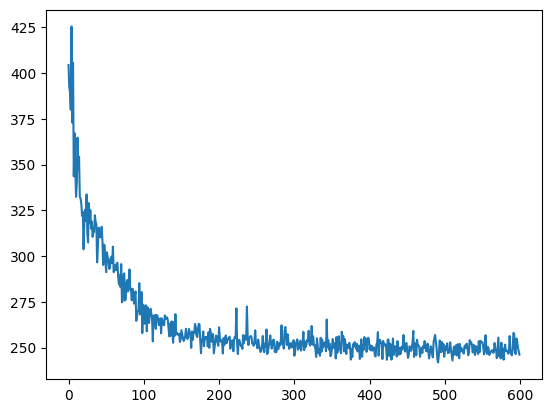

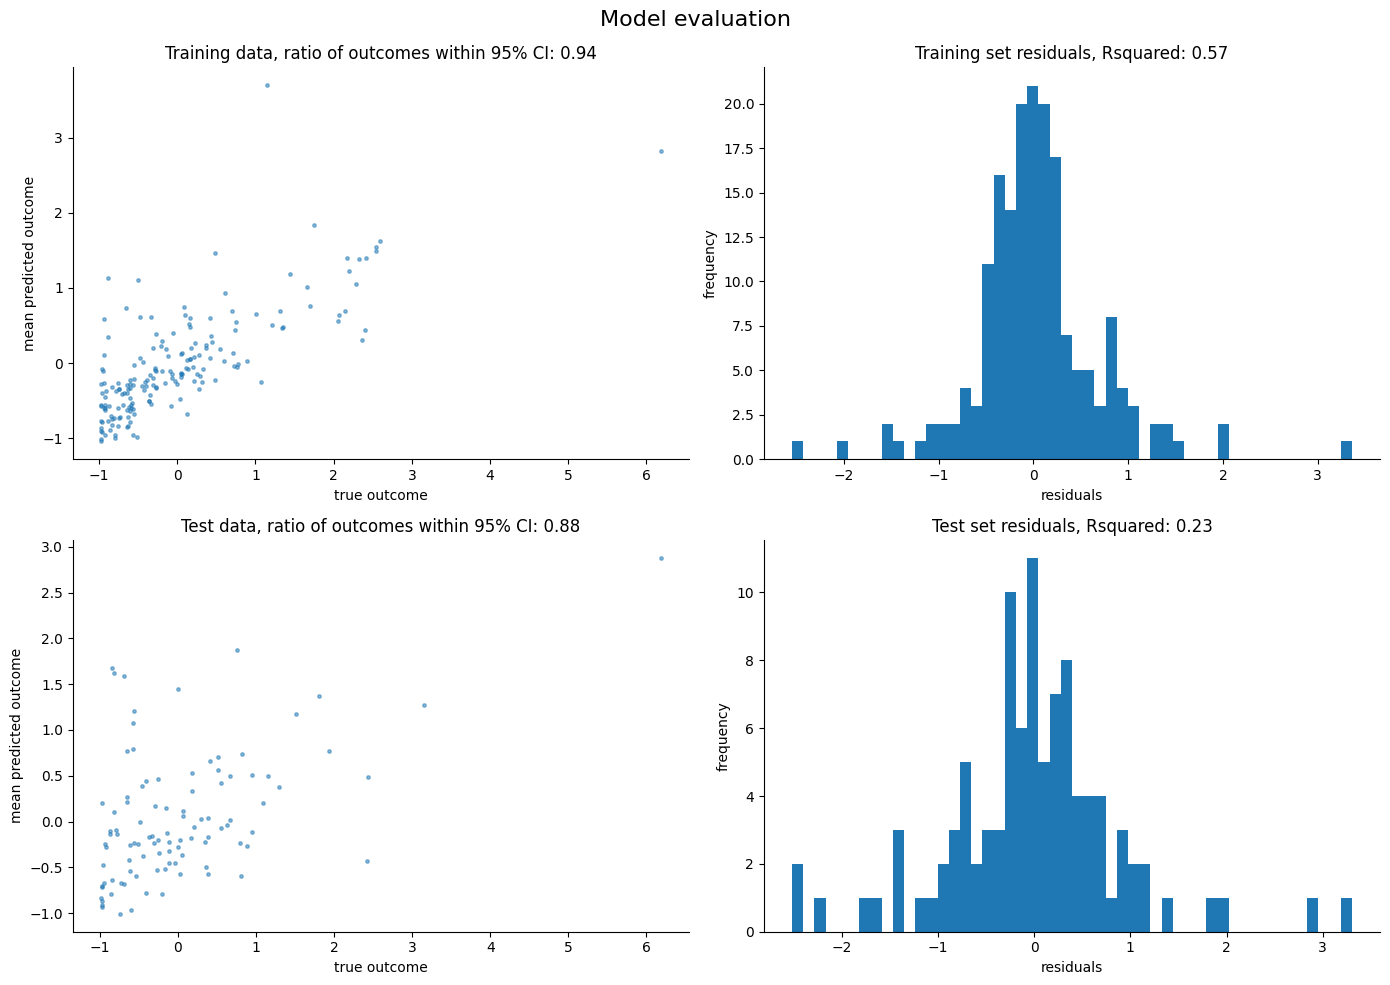

{'mae_train': 0.4503189027309418,
 'mae_test': 0.6354727745056152,
 'rsquared_train': tensor(0.5655),
 'rsquared_test': tensor(0.2273),
 'coverage_train': 0.939226508140564,
 'coverage_test': 0.8799999952316284}

In [2]:
train_loader, test_loader, categorical_levels = prep_data_for_test(train_size=0.6)

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 421.6909
[iteration 0050] loss: 283.7591
[iteration 0100] loss: 275.2489
[iteration 0150] loss: 275.4660
[iteration 0200] loss: 274.9542
[iteration 0250] loss: 275.0766
[iteration 0300] loss: 275.1693
[iteration 0350] loss: 275.5062
[iteration 0400] loss: 275.2996
[iteration 0450] loss: 274.9080
[iteration 0500] loss: 275.2175
[iteration 0550] loss: 275.2243
[iteration 0600] loss: 275.8752


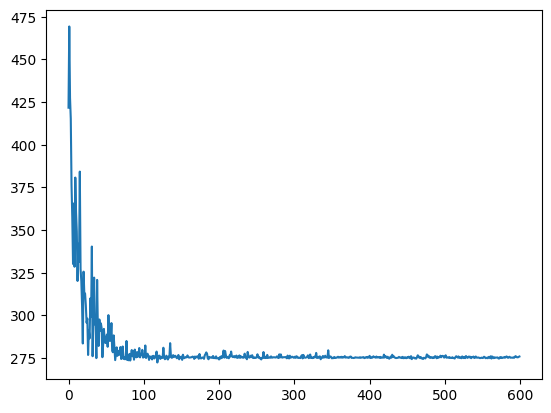

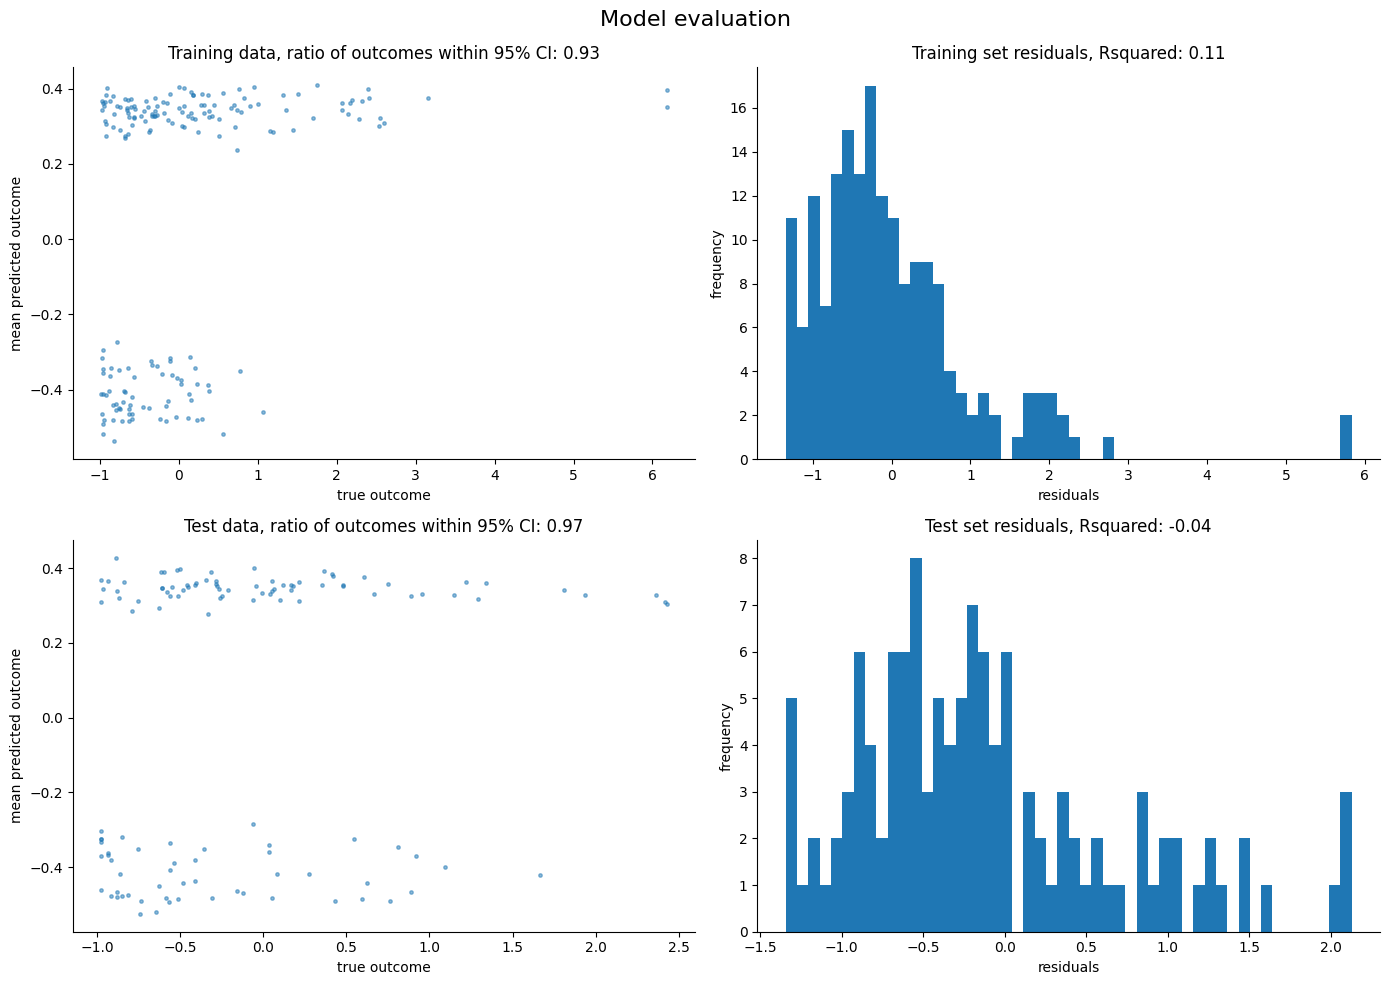

{'mae_train': 0.7356542348861694,
 'mae_test': 0.6495898365974426,
 'rsquared_train': tensor(0.1094),
 'rsquared_test': tensor(-0.0356),
 'coverage_train': 0.9281768202781677,
 'coverage_test': 0.9669421315193176}

In [3]:
# note just using limit id without parcel size is not very good

pyro.clear_param_store()

limit_kwarg_names = {
    "categorical": ["limit_id"],
    "continuous": {},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear,
    limit_kwarg_names,
    train_loader,
    test_loader,
    categorical_levels,
    plot=True,
)

[iteration 0001] loss: 812.6606
[iteration 0050] loss: 359.7283
[iteration 0100] loss: 288.0717
[iteration 0150] loss: 263.7165
[iteration 0200] loss: 250.3900
[iteration 0250] loss: 258.0603
[iteration 0300] loss: 257.3111
[iteration 0350] loss: 247.3067
[iteration 0400] loss: 246.7883
[iteration 0450] loss: 249.6171
[iteration 0500] loss: 245.8468
[iteration 0550] loss: 251.8617
[iteration 0600] loss: 245.1260


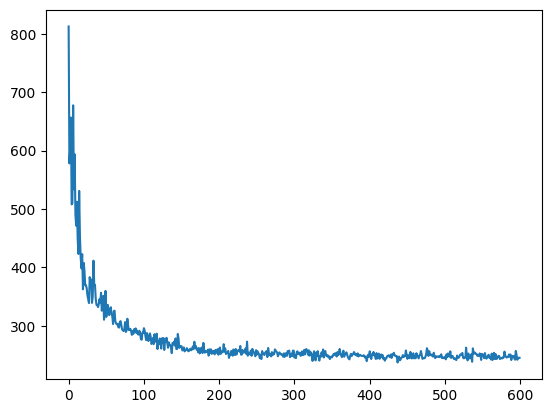

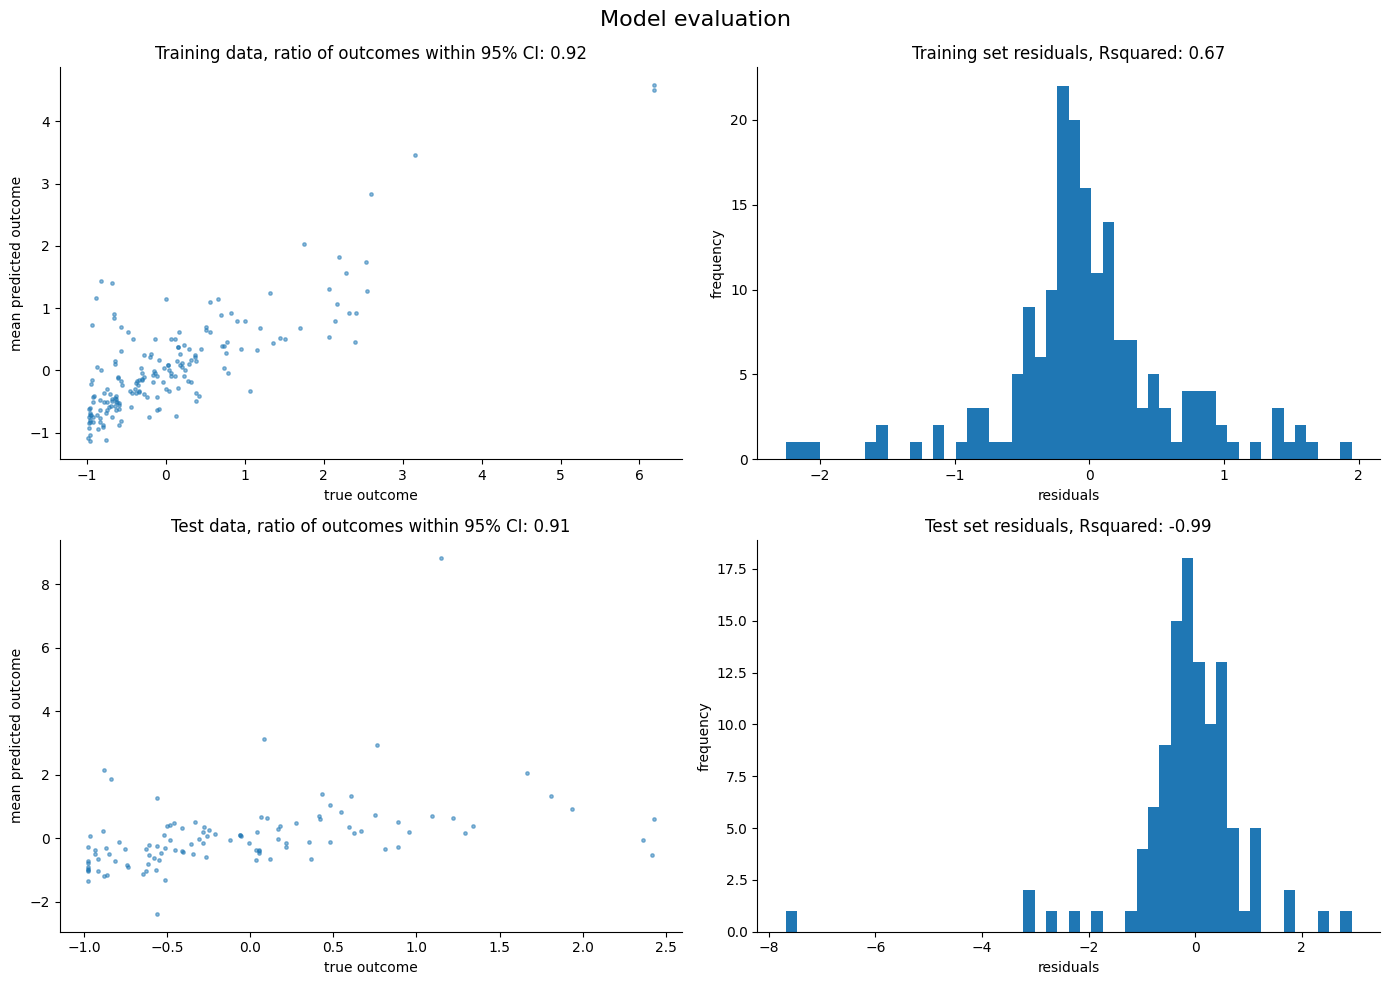

{'mae_train': 0.436811625957489,
 'mae_test': 0.6522226333618164,
 'rsquared_train': tensor(0.6733),
 'rsquared_test': tensor(-0.9898),
 'coverage_train': 0.9226519465446472,
 'coverage_test': 0.9090909361839294}

In [4]:
# adding information about year, not much improvement 

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 456.1432
[iteration 0050] loss: 310.1945
[iteration 0100] loss: 268.1730
[iteration 0150] loss: 248.6654
[iteration 0200] loss: 253.3595
[iteration 0250] loss: 255.7769
[iteration 0300] loss: 249.6176
[iteration 0350] loss: 248.9318
[iteration 0400] loss: 250.4507
[iteration 0450] loss: 248.4317
[iteration 0500] loss: 241.2205
[iteration 0550] loss: 252.2814
[iteration 0600] loss: 253.8555


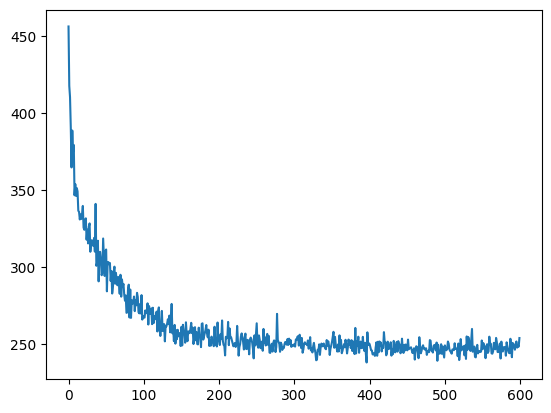

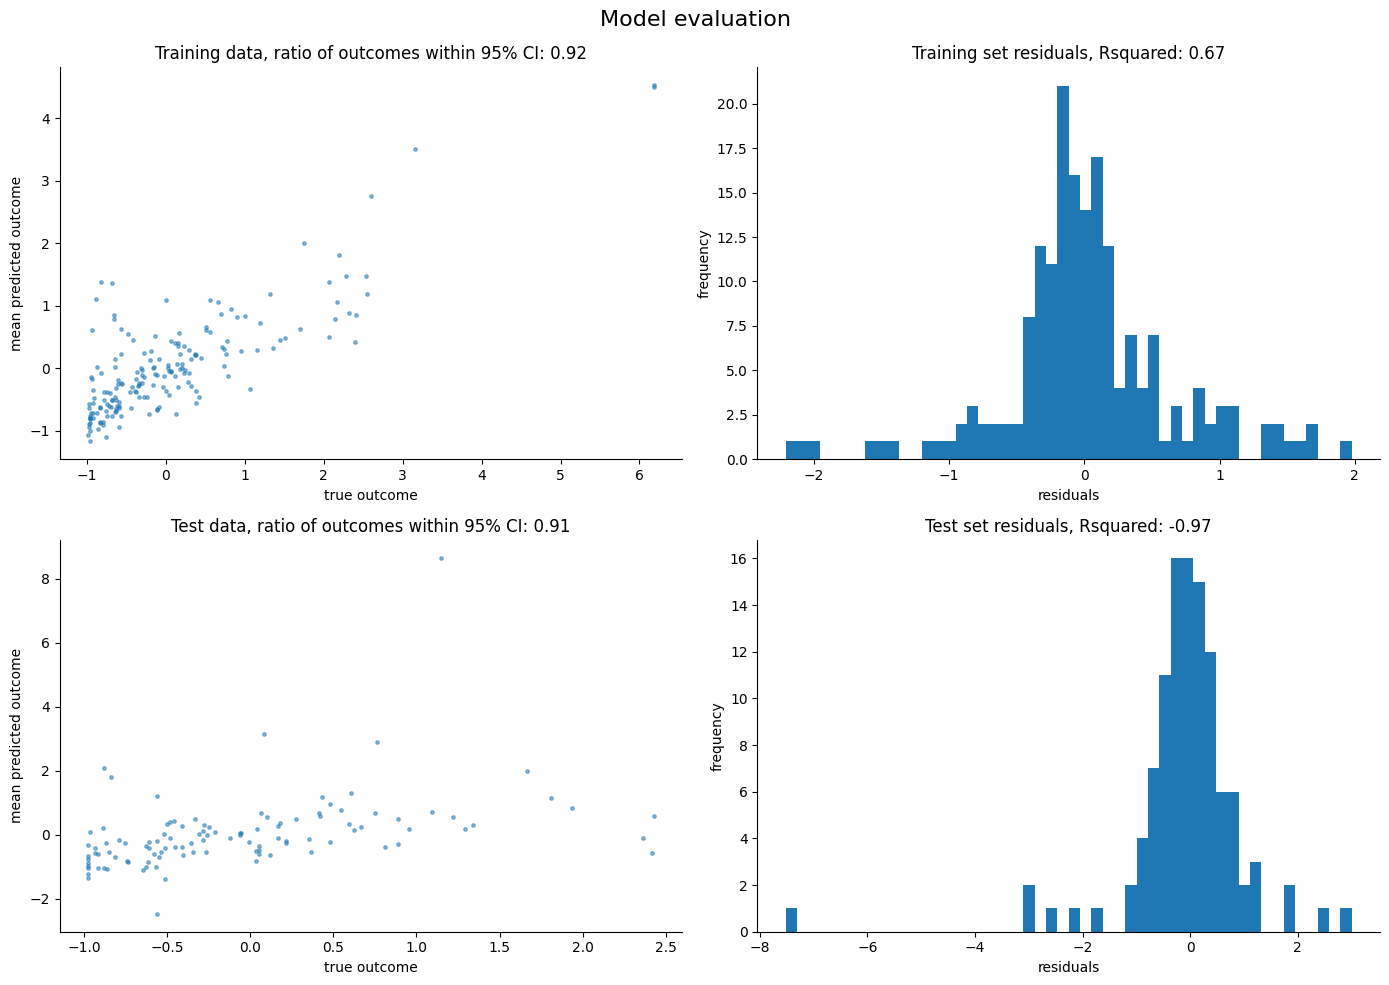

{'mae_train': 0.43739429116249084,
 'mae_test': 0.6508105397224426,
 'rsquared_train': tensor(0.6723),
 'rsquared_test': tensor(-0.9719),
 'coverage_train': 0.9171270728111267,
 'coverage_test': 0.9090909361839294}

In [5]:
# add month to linear model itself. 

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'year_id', 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 845.4012
[iteration 0050] loss: 353.9489
[iteration 0100] loss: 290.7693
[iteration 0150] loss: 265.3107
[iteration 0200] loss: 268.3149
[iteration 0250] loss: 251.5148
[iteration 0300] loss: 263.8924
[iteration 0350] loss: 247.8256
[iteration 0400] loss: 248.8544
[iteration 0450] loss: 243.0668
[iteration 0500] loss: 251.3350
[iteration 0550] loss: 248.0109
[iteration 0600] loss: 243.6116


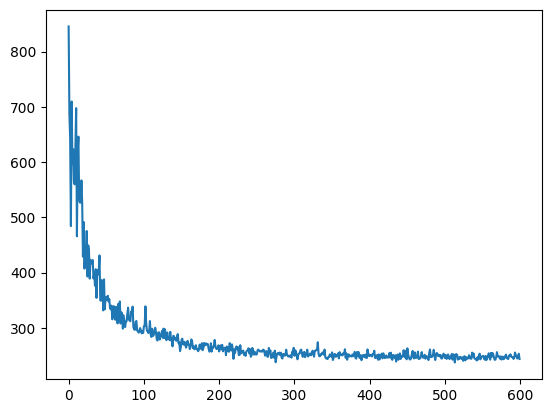

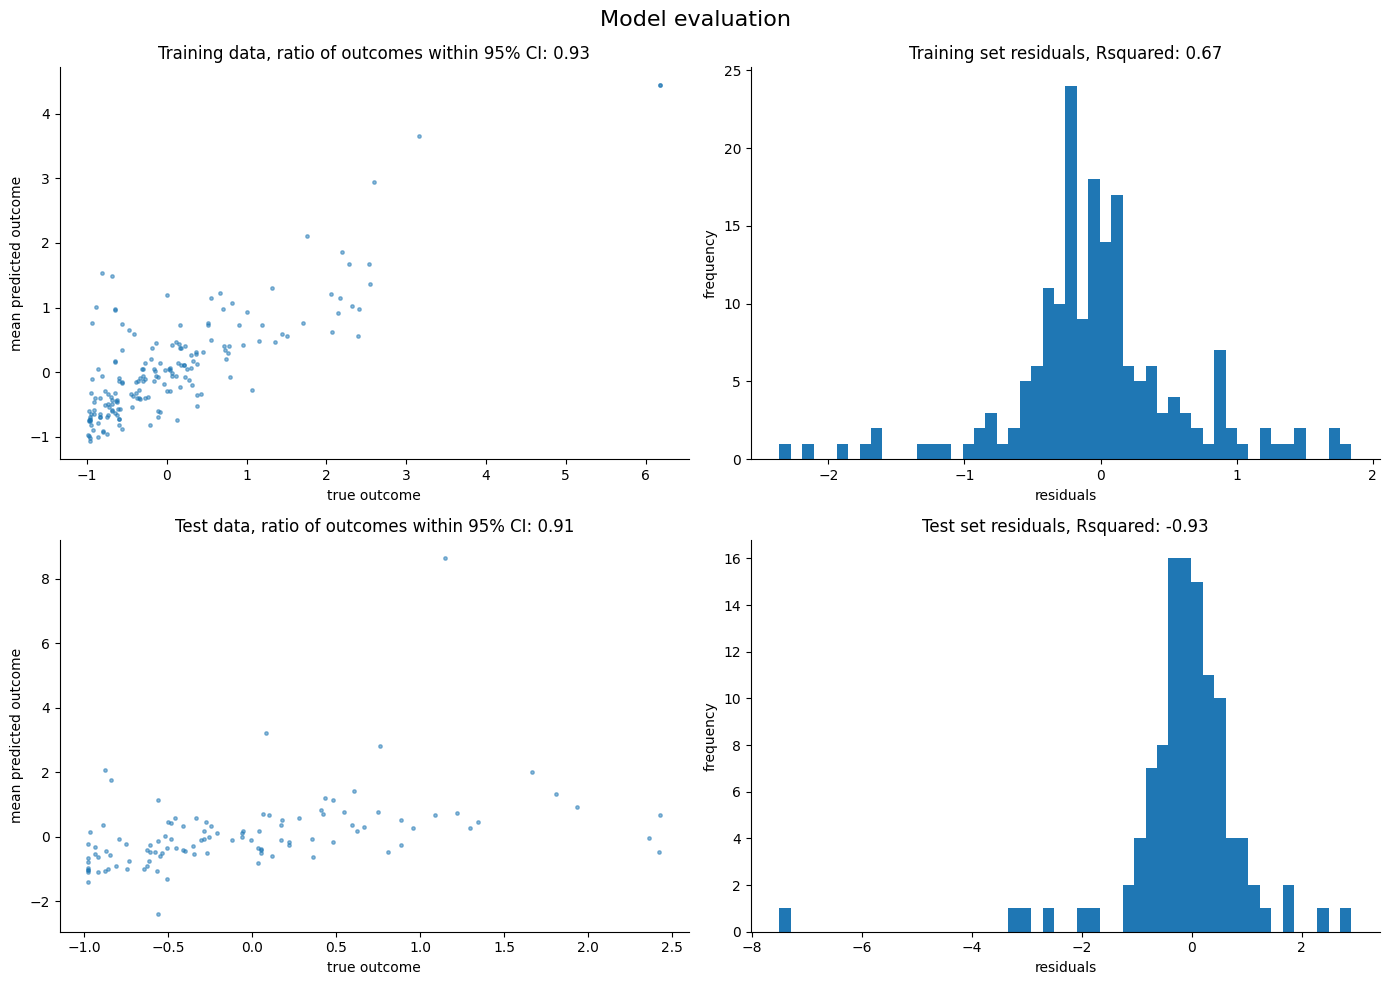

{'mae_train': 0.44122132658958435,
 'mae_test': 0.6491162180900574,
 'rsquared_train': tensor(0.6730),
 'rsquared_test': tensor(-0.9339),
 'coverage_train': 0.9337016344070435,
 'coverage_test': 0.9090909361839294}

In [6]:
# add month drop year to linear model itself.

kwarg_names = {
    "categorical": ["limit_id", "neighborhood_id", 'month_id'],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 289.5007
[iteration 0050] loss: 247.5290
[iteration 0100] loss: 246.2396
[iteration 0150] loss: 241.9760
[iteration 0200] loss: 243.6550
[iteration 0250] loss: 247.0279
[iteration 0300] loss: 242.4710
[iteration 0350] loss: 243.4262
[iteration 0400] loss: 245.4799
[iteration 0450] loss: 241.9196
[iteration 0500] loss: 242.2413
[iteration 0550] loss: 244.8159
[iteration 0600] loss: 241.5298


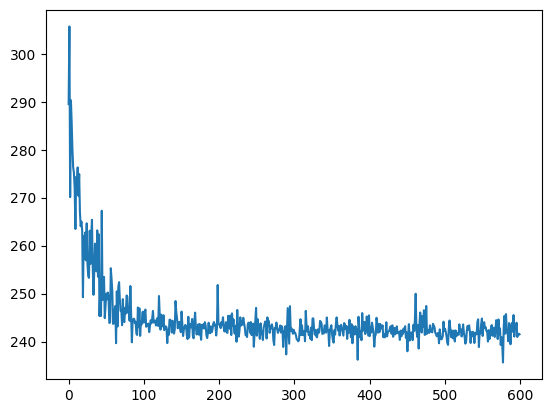

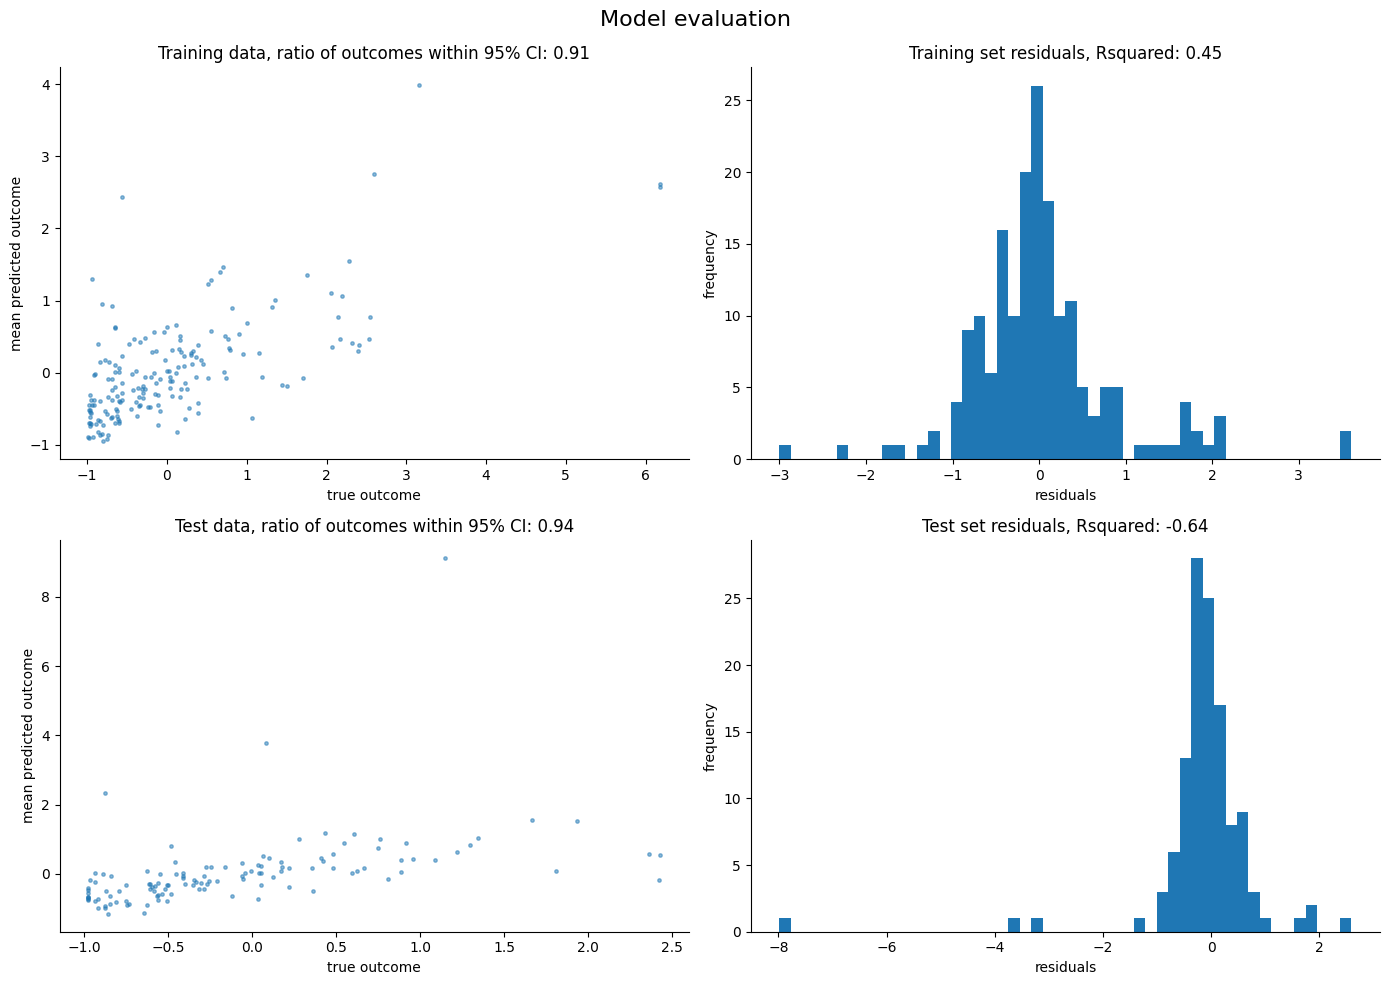

{'mae_train': 0.5511606335639954,
 'mae_test': 0.4875869154930115,
 'rsquared_train': tensor(0.4475),
 'rsquared_test': tensor(-0.6403),
 'coverage_train': 0.9060773253440857,
 'coverage_test': 0.942148745059967}

In [7]:
#switch to zones and past reform


kwarg_names = {
    "categorical": ["zone_id", "year_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)


[iteration 0001] loss: 438.9293
[iteration 0050] loss: 253.5187
[iteration 0100] loss: 248.0655
[iteration 0150] loss: 243.3379
[iteration 0200] loss: 241.8794
[iteration 0250] loss: 243.0557
[iteration 0300] loss: 240.1858
[iteration 0350] loss: 241.4935
[iteration 0400] loss: 241.8005
[iteration 0450] loss: 240.3240
[iteration 0500] loss: 242.2287
[iteration 0550] loss: 241.1464
[iteration 0600] loss: 242.0764


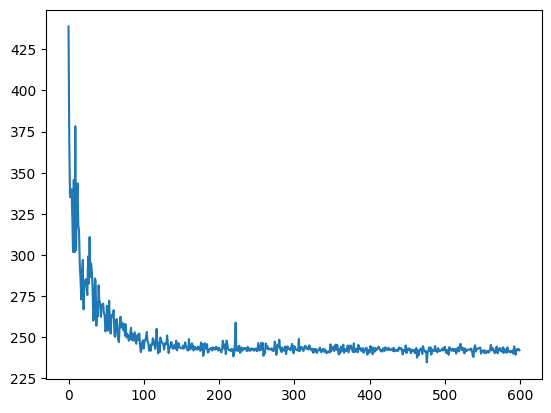

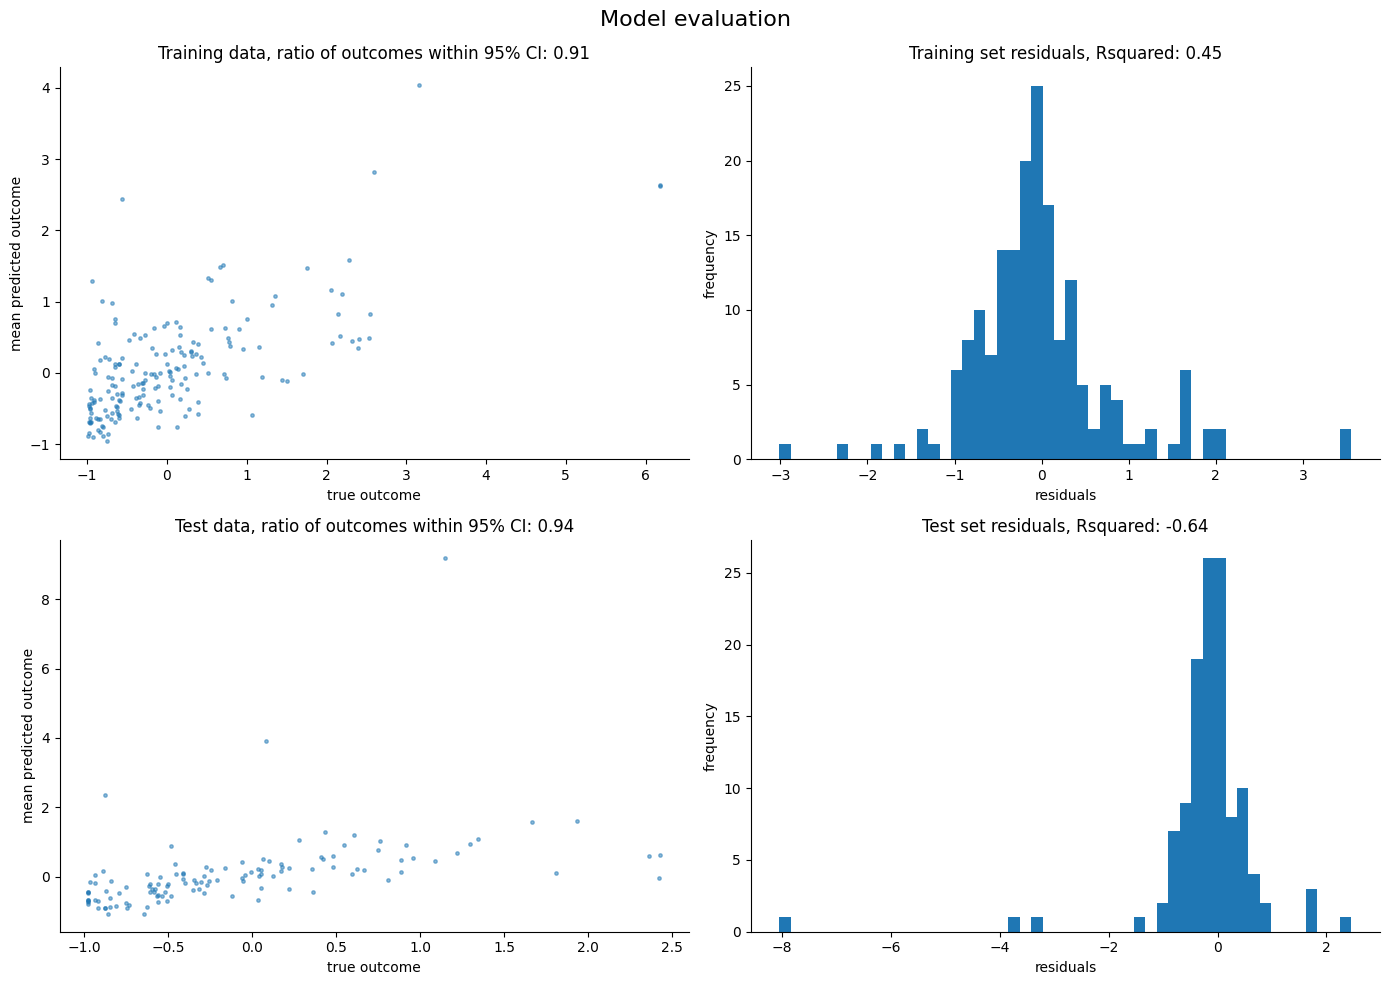

{'mae_train': 0.5590494275093079,
 'mae_test': 0.492959588766098,
 'rsquared_train': tensor(0.4476),
 'rsquared_test': tensor(-0.6446),
 'coverage_train': 0.9116021990776062,
 'coverage_test': 0.942148745059967}

In [8]:
# drop year as causally up from past reform

kwarg_names = {
    "categorical": ["zone_id", 'month_id', "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)

[iteration 0001] loss: 447.6127
[iteration 0050] loss: 247.5638
[iteration 0100] loss: 244.0440
[iteration 0150] loss: 243.3030
[iteration 0200] loss: 243.6499
[iteration 0250] loss: 246.8428
[iteration 0300] loss: 240.4865
[iteration 0350] loss: 242.9399
[iteration 0400] loss: 242.0193
[iteration 0450] loss: 244.3985
[iteration 0500] loss: 242.4044
[iteration 0550] loss: 243.0732
[iteration 0600] loss: 242.6161


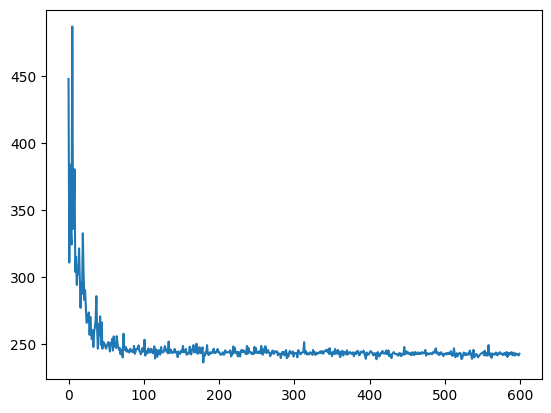

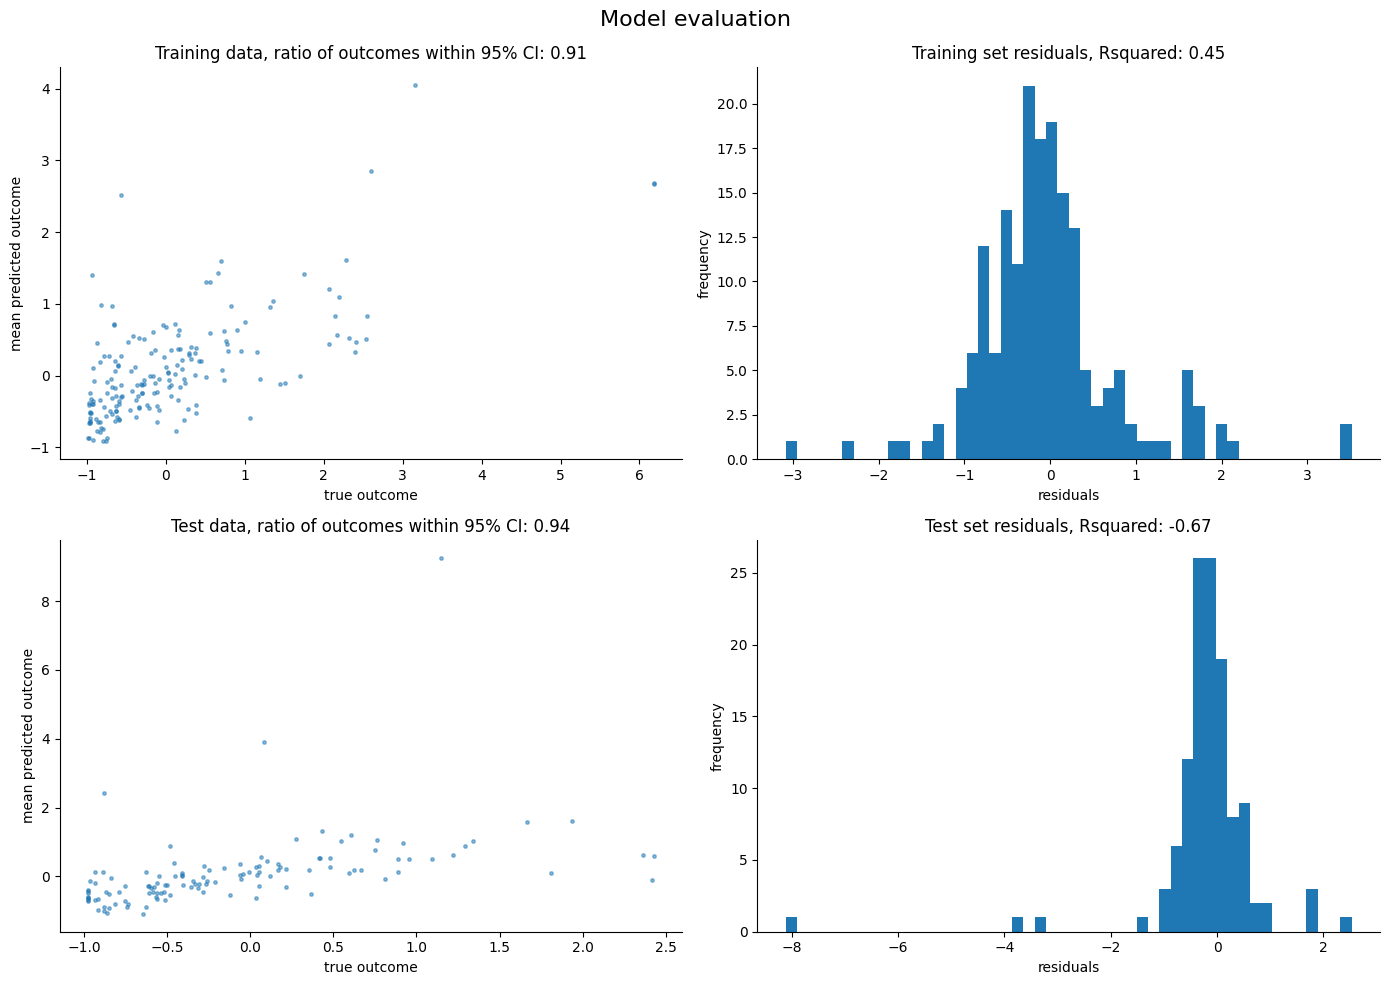

{'mae_train': 0.5635418891906738,
 'mae_test': 0.5025414228439331,
 'rsquared_train': tensor(0.4458),
 'rsquared_test': tensor(-0.6711),
 'coverage_train': 0.9060773253440857,
 'coverage_test': 0.942148745059967}

In [9]:
#drop month

kwarg_names = {
    "categorical": ["zone_id", "past_reform"],
    "continuous": {"parcel_area"},
    "outcome": "housing_units",
}

test_performance(
    SimpleLinear, kwarg_names, train_loader, test_loader, categorical_levels, plot=True
)